In [23]:
import os

# Path to the original dataset folder containing all class folders
dataset_path = 'Dataset/Cotton'

# List all subdirectories (classes)
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    
    if os.path.isdir(class_path):
        file_count = len([
            f for f in os.listdir(class_path)
            if os.path.isfile(os.path.join(class_path, f)) and not f.startswith('.')
        ])
        print(f"{class_name}: {file_count} image files")

Leaf Hopper Jassids: 1000 image files
Healthy Leaf: 1000 image files
Leaf Variegation: 1000 image files
Bacterial Blight: 1000 image files
Leaf Redding: 1000 image files


In [24]:
import os

# Path to the original dataset folder containing all class folders
dataset_path = 'Dataset/Rice'

# List all subdirectories (classes)
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    
    if os.path.isdir(class_path):
        file_count = len([
            f for f in os.listdir(class_path)
            if os.path.isfile(os.path.join(class_path, f)) and not f.startswith('.')
        ])
        print(f"{class_name}: {file_count} image files")

Rice Hispa: 1299 image files
Neck_Blast: 1000 image files
Sheath Blight: 1629 image files
Healthy Rice Leaf: 1085 image files
Brown Spot: 1546 image files


In [25]:
import os

# Path to the original dataset folder containing all class folders
dataset_path = 'Dataset/Apple'

# List all subdirectories (classes)
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    
    if os.path.isdir(class_path):
        file_count = len([
            f for f in os.listdir(class_path)
            if os.path.isfile(os.path.join(class_path, f)) and not f.startswith('.')
        ])
        print(f"{class_name}: {file_count} image files")

Apple___Powdery_mildew: 1184 image files
Apple___Cedar_apple_rust: 1000 image files
Apple___Apple_scab: 1000 image files
Apple___Black_rot: 1000 image files
Apple___healthy: 1645 image files


In [26]:
import os

# Path to the original dataset folder containing all class folders
dataset_path = 'Dataset/Tomato'

# List all subdirectories (classes)
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    
    if os.path.isdir(class_path):
        file_count = len([
            f for f in os.listdir(class_path)
            if os.path.isfile(os.path.join(class_path, f)) and not f.startswith('.')
        ])
        print(f"{class_name}: {file_count} image files")

new ealry blight: 1000 image files
newcurl: 999 image files
new Target_Spot: 1404 image files
newhealthy: 1000 image files
.ipynb_checkpoints: 1 image files
new bacterialspot: 1000 image files


In [27]:
import os

# Set the path to your dataset folder
dataset_path = 'Dataset/Tomato'  # <-- change this

# Counter to keep track of removed files
deleted_count = 0

# Walk through all subdirectories
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file == '.DS_Store':
            file_path = os.path.join(root, file)
            try:
                os.remove(file_path)
                deleted_count += 1
                print(f"Deleted: {file_path}")
            except Exception as e:
                print(f"Error deleting {file_path}: {e}")

print(f"\n✅ Total .DS_Store files deleted: {deleted_count}")


✅ Total .DS_Store files deleted: 0


In [30]:
import os
import pandas as pd

# Set your dataset root directory
dataset_dir = "Dataset"   # e.g. "./LeafDataset"

data_summary = []

# Traverse through folders
for crop in os.listdir(dataset_dir):
    crop_path = os.path.join(dataset_dir, crop)
    if os.path.isdir(crop_path):
        for disease in os.listdir(crop_path):
            disease_path = os.path.join(crop_path, disease)
            if os.path.isdir(disease_path):
                num_images = len([f for f in os.listdir(disease_path) if f.lower().endswith(('.png','.jpg','.jpeg'))])
                data_summary.append([crop, disease, num_images])

# Convert to DataFrame for better visualization
df = pd.DataFrame(data_summary, columns=["Crop", "Disease", "Image_Count"])
print(df)

# Total images
print("\nTotal images:", df["Image_Count"].sum())

      Crop                   Disease  Image_Count
0    Apple    Apple___Powdery_mildew         1184
1    Apple  Apple___Cedar_apple_rust         1000
2    Apple        Apple___Apple_scab         1000
3    Apple         Apple___Black_rot         1000
4    Apple           Apple___healthy         1645
5     Rice                Rice Hispa         1299
6     Rice                Neck_Blast         1000
7     Rice             Sheath Blight         1629
8     Rice         Healthy Rice Leaf         1085
9     Rice                Brown Spot         1546
10  Cotton       Leaf Hopper Jassids         1000
11  Cotton              Healthy Leaf         1000
12  Cotton          Leaf Variegation         1000
13  Cotton          Bacterial Blight         1000
14  Cotton              Leaf Redding         1000
15  Tomato          new ealry blight         1000
16  Tomato                   newcurl          999
17  Tomato           new Target_Spot         1404
18  Tomato                newhealthy         1000


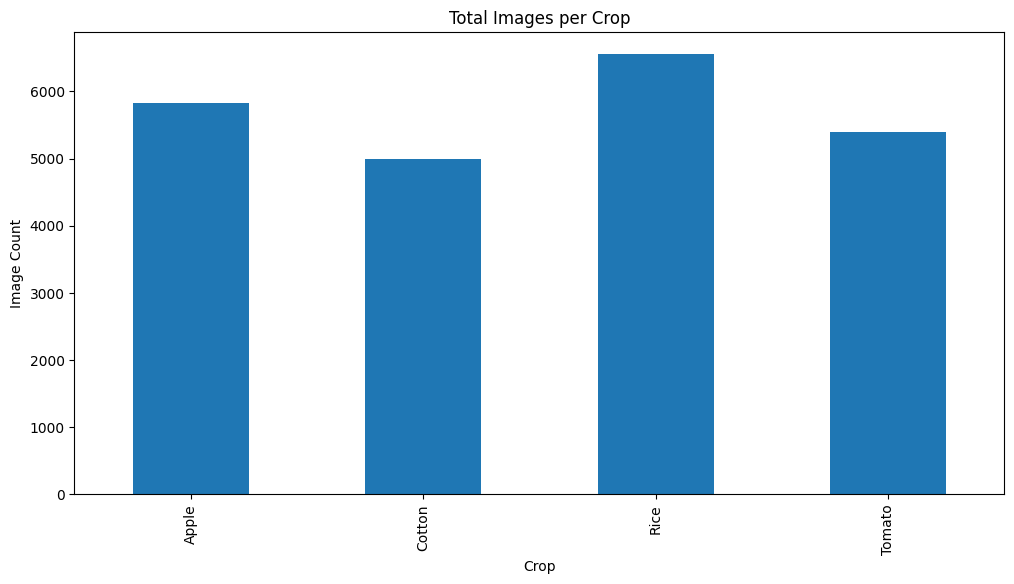

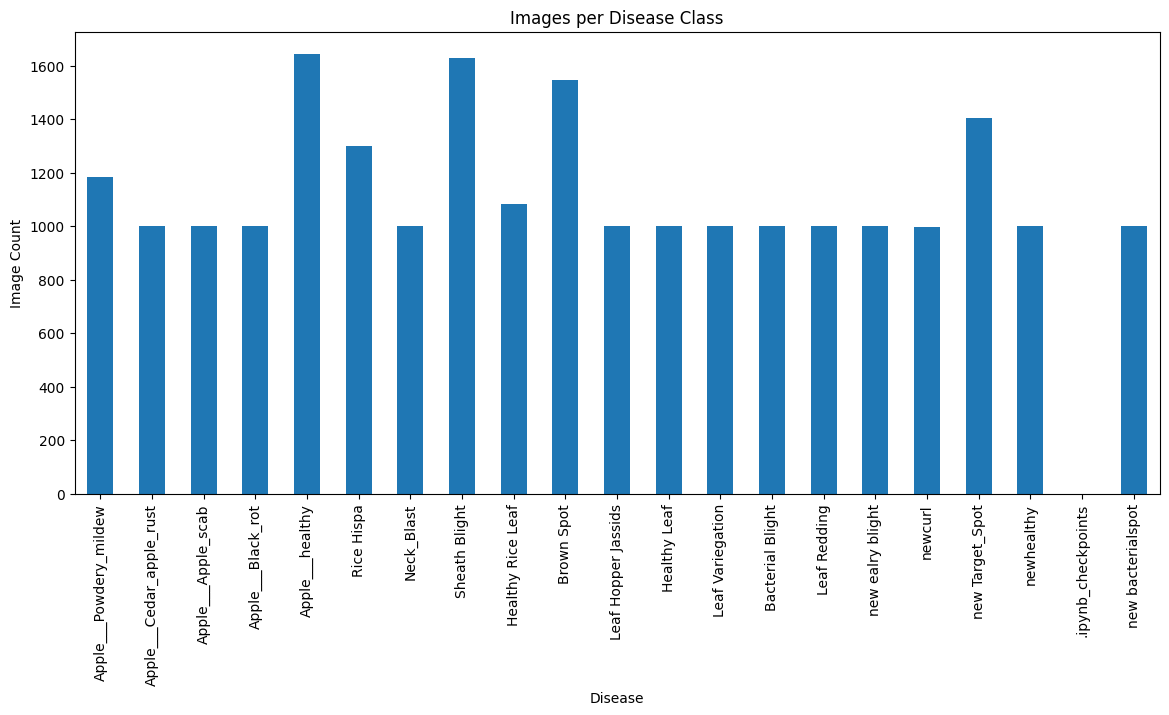

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
df.groupby("Crop")["Image_Count"].sum().plot(kind="bar")
plt.title("Total Images per Crop")
plt.ylabel("Image Count")
plt.show()

plt.figure(figsize=(14,6))
df.set_index("Disease")["Image_Count"].plot(kind="bar")
plt.title("Images per Disease Class")
plt.ylabel("Image Count")
plt.xticks(rotation=90)
plt.show()

In [20]:
import os
import pandas as pd

base_dir = 'Dataset'

data = []
for crop in os.listdir(base_dir):
    crop_path = os.path.join(base_dir, crop)
    if not os.path.isdir(crop_path):
        continue
    for disease in os.listdir(crop_path):
        disease_path = os.path.join(crop_path, disease)
        for img in os.listdir(disease_path):
            if img.endswith(('.jpg', '.png', '.jpeg')):
                data.append({
                    'image_path': os.path.join(crop_path, disease, img),
                    'crop': crop,
                    'disease': disease,
                    'label': f"{crop}_{disease}"
                })

df = pd.DataFrame(data)
df.to_csv('combined_crop_disease_labels.csv', index=False)

In [21]:
df

,image_path,crop,disease,label
0,Dataset/Apple/Apple___Powdery_mildew/Powdery m...,Apple,Apple___Powdery_mildew,Apple_Apple___Powdery_mildew
1,Dataset/Apple/Apple___Powdery_mildew/Powdery m...,Apple,Apple___Powdery_mildew,Apple_Apple___Powdery_mildew
2,Dataset/Apple/Apple___Powdery_mildew/Powdery m...,Apple,Apple___Powdery_mildew,Apple_Apple___Powdery_mildew
3,Dataset/Apple/Apple___Powdery_mildew/Powdery m...,Apple,Apple___Powdery_mildew,Apple_Apple___Powdery_mildew
4,Dataset/Apple/Apple___Powdery_mildew/Powdery m...,Apple,Apple___Powdery_mildew,Apple_Apple___Powdery_mildew
...,...,...,...,...
18141,Dataset/Tomato/new bacterialspot/img_481.jpg,Tomato,new bacterialspot,Tomato_new bacterialspot
18142,Dataset/Tomato/new bacterialspot/img_1307.jpg,Tomato,new bacterialspot,Tomato_new bacterialspot
18143,Dataset/Tomato/new bacterialspot/img_1313.jpg,Tomato,new bacterialspot,Tomato_new bacterialspot
18144,Dataset/Tomato/new bacterialspot/img_495.jpg,Tomato,new bacterialspot,Tomato_new bacterialspot


In [22]:
df.value_counts

<bound method DataFrame.value_counts of                                               image_path    crop  \
0      Dataset/Apple/Apple___Powdery_mildew/Powdery m...   Apple   
1      Dataset/Apple/Apple___Powdery_mildew/Powdery m...   Apple   
2      Dataset/Apple/Apple___Powdery_mildew/Powdery m...   Apple   
3      Dataset/Apple/Apple___Powdery_mildew/Powdery m...   Apple   
4      Dataset/Apple/Apple___Powdery_mildew/Powdery m...   Apple   
...                                                  ...     ...   
18141       Dataset/Tomato/new bacterialspot/img_481.jpg  Tomato   
18142      Dataset/Tomato/new bacterialspot/img_1307.jpg  Tomato   
18143      Dataset/Tomato/new bacterialspot/img_1313.jpg  Tomato   
18144       Dataset/Tomato/new bacterialspot/img_495.jpg  Tomato   
18145       Dataset/Tomato/new bacterialspot/img_456.jpg  Tomato   

                      disease                         label  
0      Apple___Powdery_mildew  Apple_Apple___Powdery_mildew  
1      Apple___Powd